In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from src.classifier import train_models, remove_na_values
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Feature selection from random forest

In [2]:
models = [RandomForestClassifier(random_state=0)]

df = remove_na_values(pd.read_csv('data/data.csv'))

In [3]:
results, models = train_models(models, df)
rf = models[0]

100%|██████████| 1/1 [00:07<00:00,  7.96s/it]


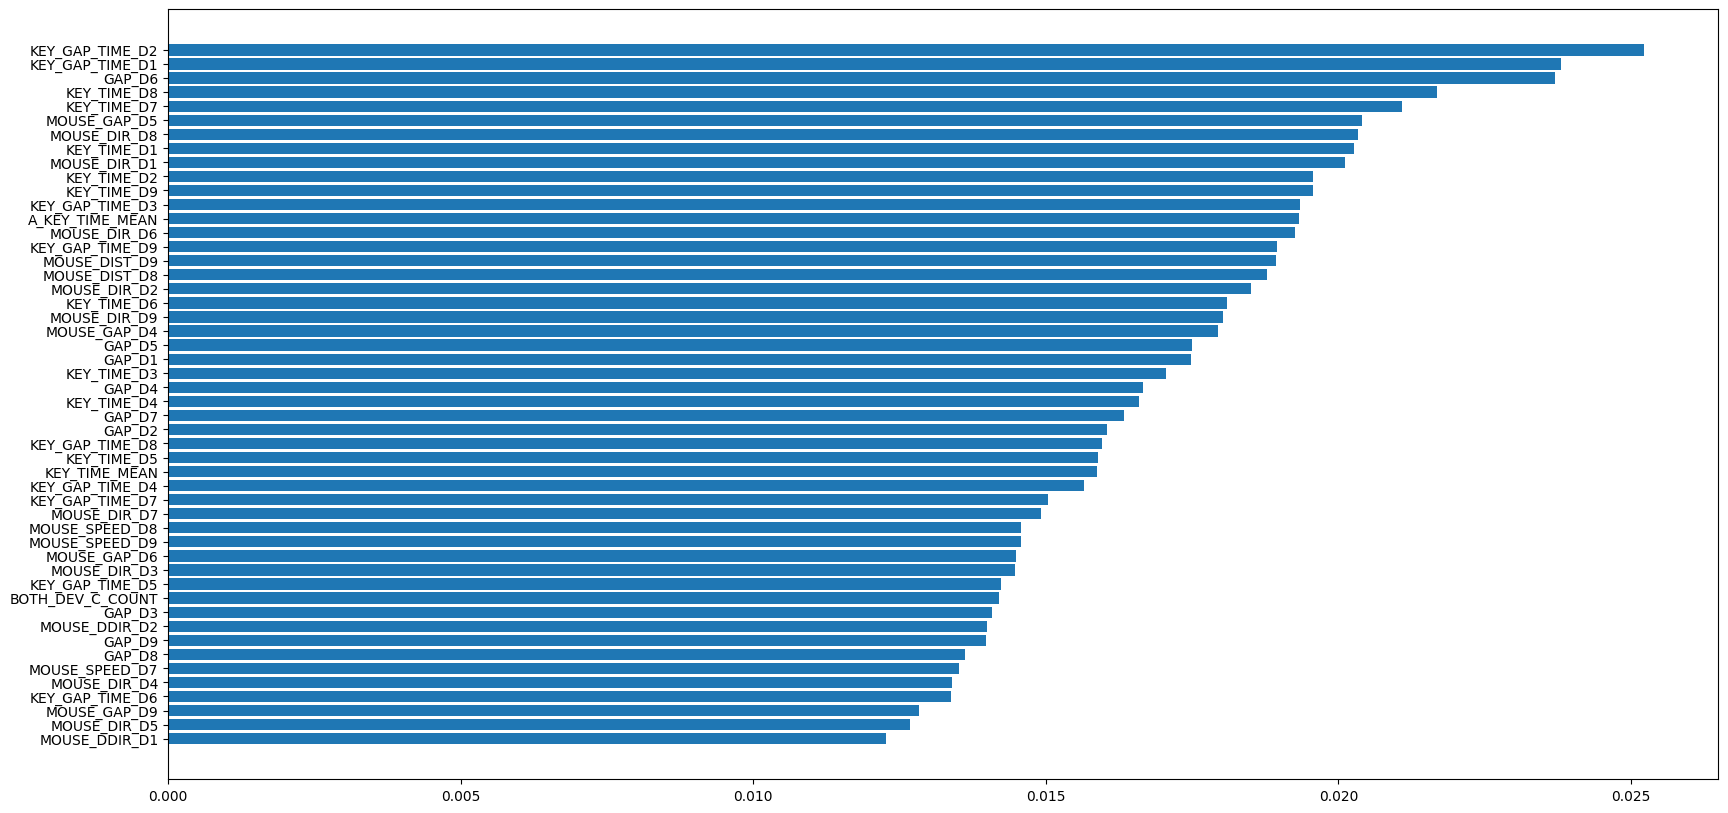

In [16]:
fi = pd.DataFrame({'name': df.columns[4:], 'importance': rf.feature_importances_})
fi.sort_values('importance', inplace=True)

n = 50
plt.figure(figsize=(20, 10))
plt.barh(fi.name[-n:], fi.importance[-n:])
plt.show()

## Feature selection from arbitrary model

In [17]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

models = [
    RandomForestClassifier(random_state=0),
    # GradientBoostingClassifier(),
    MLPClassifier(),
    KNeighborsClassifier(n_neighbors=3, weights='distance'),
    LinearDiscriminantAnalysis()
]

selectors = [SelectFromModel(estimator=model) for model in models]

for model in tqdm(selectors):
    x = df.iloc[:, 4:]
    y = df.iloc[:, 0]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    model.fit(x_train, y_train)

100%|██████████| 4/4 [00:15<00:00,  3.81s/it]


In [21]:
selectors[0]

RandomForestClassifier(random_state=0)